## Setup

Requirements:


In [92]:
#Load Packages
import pandas as pd
import numpy as np
import patsy as pt
import plotly.express as px
import nbformat
import plotly as py

In [93]:
#Load Data
data = pd.read_csv("amazon-purchases.csv")
survey_data = pd.read_csv("survey.csv")

# Data Pre-Processing

In [94]:
#Add a prime purchase column to the data

#Create a list with prime days inside it
prime_days = ["2022-07-12", "2022-07-13", "2021-06-21", "2021-06-22", "2020-10-13", "2020-10-14", "2019-07-15", "2019-07-16", "2018-07-17", "2018-07-18",]

prime_purchase = []
for i in data["Order Date"]:
    if i in prime_days:
        prime_purchase.append(1)
    else:
        prime_purchase.append(0)
data["Prime Purchase"] = prime_purchase

In [95]:
#Use prime purchase data to create a prime day customer list
prime_day_customer = []
for i in range(len(data)):
    if data["Prime Purchase"][i] == 1:
        prime_day_customer.append(data["Survey ResponseID"][i])
prime_day_customer = set(prime_day_customer)

prime_customer = []
for i in data["Survey ResponseID"]:
    if i in prime_day_customer:
        prime_customer.append(1)
    else:
        prime_customer.append(0)

data["Prime Customer"] = prime_customer

In [96]:
# Merge the purchase data with customer surveys on 'Survey ResponseID'
merged_data = pd.merge(data, survey_data, on='Survey ResponseID', how='inner')

# Display the first few rows of the merged dataframe
print(merged_data.shape, data.shape, survey_data.shape)

(1850717, 32) (1850717, 10) (5027, 23)


In [97]:
subset_data = merged_data[(merged_data['Q-demos-gender'] == 'Female') & (merged_data['Q-demos-age'] != '65 and older') & (merged_data['Prime Customer'] == 1) & (merged_data['Q-amazon-use-howmany']=='1 (just me!)')]

In [98]:
subset_data['Revenue'] = subset_data['Quantity'] * subset_data['Purchase Price Per Unit']

/var/folders/nn/_6jjwh6j0m58wcktbd1s30pc0000gn/T/ipykernel_1552/2146859090.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
subset_data.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Prime Purchase,Prime Customer,...,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,Revenue
140,2018-01-18,17.16,1.0,PA,"NOW Foods, Certified Organic Better Stevia, Ex...",B005F9XFN0,SUGAR_SUBSTITUTE,R_037XK72IZBJyF69,0,1,...,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,17.16
141,2018-01-18,6.49,1.0,PA,"F.M. Brown'S Encore Parakeet Food, 5-Pound",B000HHSHZG,PET_FOOD,R_037XK72IZBJyF69,0,1,...,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,6.49
142,2018-01-18,14.99,1.0,PA,COTTON CRAFT - Scandia Stripe 12 Pack - Pure C...,B014V1IYEM,TOWEL,R_037XK72IZBJyF69,0,1,...,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,14.99
143,2018-01-18,12.99,1.0,PA,"XREXS 4 Channels Digital Kitchen Timer Clock, ...",B01K4JKFK6,TIMER,R_037XK72IZBJyF69,0,1,...,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,12.99
144,2018-01-18,12.87,1.0,PA,Premium Wrist Rests for Keyboard and Mouse Pad...,B01A92ETXM,WRIST_REST,R_037XK72IZBJyF69,0,1,...,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,12.87


Data exploration

In [100]:
unique_responses_by_gender = merged_data.groupby('Q-demos-gender')['Survey ResponseID'].nunique()
print(unique_responses_by_gender)

Q-demos-gender
Female               2589
Male                 2311
Other                 116
Prefer not to say      11
Name: Survey ResponseID, dtype: int64


In [101]:
subset_data['Order Date'].max()
record = subset_data[merged_data['Order Date'] == subset_data['Order Date'].max()]
record

/var/folders/nn/_6jjwh6j0m58wcktbd1s30pc0000gn/T/ipykernel_1552/4112819008.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Prime Purchase,Prime Customer,...,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,Revenue
307061,2023-03-21,35.99,1.0,NJ,occer 12x25 Compact Binoculars with Clear Low ...,B0756BXDTX,BINOCULAR,R_1jUqdfR1Zz6mZMf,0,1,...,Yes,No,No,Moved place of residence,Yes if I get part of the profit,Yes if consumers get part of the profit,No,I don't know,Yes,35.99
307062,2023-03-21,5.49,1.0,NJ,Aquaphor Healing Ointment Advanced Therapy Ski...,B001IAG7G2,SKIN_MOISTURIZER,R_1jUqdfR1Zz6mZMf,0,1,...,Yes,No,No,Moved place of residence,Yes if I get part of the profit,Yes if consumers get part of the profit,No,I don't know,Yes,5.49
1710835,2023-03-21,12.99,1.0,NY,NeilMed Sinus Rinse All Natural Relief Premixe...,B00TU5P33K,MEDICATION,R_e8KTElZZLWryLWp,0,1,...,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,I don't know,I don't know,12.99


In [102]:
subset_data.columns

Index(['Order Date', 'Purchase Price Per Unit', 'Quantity',
       'Shipping Address State', 'Title', 'ASIN/ISBN (Product Code)',
       'Category', 'Survey ResponseID', 'Prime Purchase', 'Prime Customer',
       'Q-demos-age', 'Q-demos-hispanic', 'Q-demos-race', 'Q-demos-education',
       'Q-demos-income', 'Q-demos-gender', 'Q-sexual-orientation',
       'Q-demos-state', 'Q-amazon-use-howmany', 'Q-amazon-use-hh-size',
       'Q-amazon-use-how-oft', 'Q-substance-use-cigarettes',
       'Q-substance-use-marijuana', 'Q-substance-use-alcohol',
       'Q-personal-diabetes', 'Q-personal-wheelchair', 'Q-life-changes',
       'Q-sell-YOUR-data', 'Q-sell-consumer-data', 'Q-small-biz-use',
       'Q-census-use', 'Q-research-society', 'Revenue'],
      dtype='object')

In [103]:
# Convert 'Order Date' to datetime
subset_data['Order Date'] = pd.to_datetime(subset_data['Order Date'])

# Group by 'Order Date' and sum the 'Purchase Price Per Unit'
transaction_totals = subset_data.groupby(['Order Date', 'Q-demos-gender'])['Purchase Price Per Unit'].sum().reset_index()

# Plot the time series
px.line(transaction_totals, x='Order Date', y='Purchase Price Per Unit', title='Transaction Totals Over Time')

/var/folders/nn/_6jjwh6j0m58wcktbd1s30pc0000gn/T/ipykernel_1552/758613859.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
subset_data['Year'] = subset_data['Order Date'].dt.year
subset_data['Month'] = subset_data['Order Date'].dt.month
subset_data['Day'] = subset_data['Order Date'].dt.day
subset_data['Day of Week'] = subset_data['Order Date'].dt.dayofweek

/var/folders/nn/_6jjwh6j0m58wcktbd1s30pc0000gn/T/ipykernel_1552/1763971896.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nn/_6jjwh6j0m58wcktbd1s30pc0000gn/T/ipykernel_1552/1763971896.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nn/_6jjwh6j0m58wcktbd1s30pc0000gn/T/ipykernel_1552/1763971896.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [105]:
subset_data.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Prime Purchase,Prime Customer,...,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,Revenue,Year,Month,Day,Day of Week
140,2018-01-18,17.16,1.0,PA,"NOW Foods, Certified Organic Better Stevia, Ex...",B005F9XFN0,SUGAR_SUBSTITUTE,R_037XK72IZBJyF69,0,1,...,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,17.16,2018,1,18,3
141,2018-01-18,6.49,1.0,PA,"F.M. Brown'S Encore Parakeet Food, 5-Pound",B000HHSHZG,PET_FOOD,R_037XK72IZBJyF69,0,1,...,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,6.49,2018,1,18,3
142,2018-01-18,14.99,1.0,PA,COTTON CRAFT - Scandia Stripe 12 Pack - Pure C...,B014V1IYEM,TOWEL,R_037XK72IZBJyF69,0,1,...,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,14.99,2018,1,18,3
143,2018-01-18,12.99,1.0,PA,"XREXS 4 Channels Digital Kitchen Timer Clock, ...",B01K4JKFK6,TIMER,R_037XK72IZBJyF69,0,1,...,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,12.99,2018,1,18,3
144,2018-01-18,12.87,1.0,PA,Premium Wrist Rests for Keyboard and Mouse Pad...,B01A92ETXM,WRIST_REST,R_037XK72IZBJyF69,0,1,...,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,12.87,2018,1,18,3


# Clustering for Feature Selection

K-means for purchase quantity and purchase totals

In [106]:
#Group by survey response id and count the number of prime purchases and sum the price per unit
prime_users = subset_data.groupby("Survey ResponseID").agg({"Prime Purchase":"sum", "Purchase Price Per Unit":"sum"})
#Left join prime purchases with survey data
print(prime_users.shape)
#Rename 

(1000, 2)


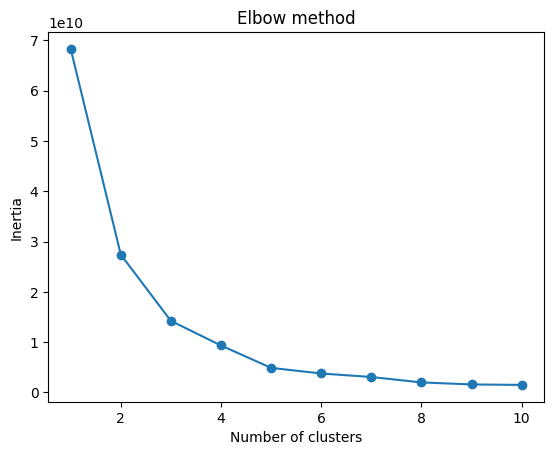

In [107]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_data = list(zip(prime_users['Prime Purchase'], prime_users['Purchase Price Per Unit']))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

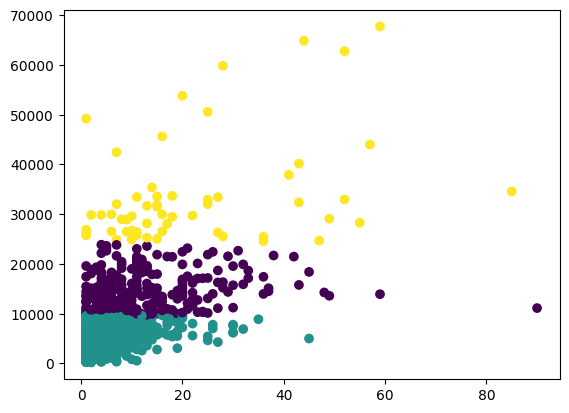

In [108]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(k_data)

plt.scatter(prime_users['Prime Purchase'], prime_users['Purchase Price Per Unit'], c=kmeans.labels_)
plt.show()

In [109]:
# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Display the labels assigned to each data point
print("Cluster Labels:")
print(kmeans.labels_)

prime_users['cluster'] = kmeans.labels_

Cluster Centers:
[[1.20862069e+01 1.45064155e+04]
 [5.24349158e+00 4.98464548e+03]
 [2.23157895e+01 3.37570512e+04]]
Cluster Labels:
[0 1 2 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 2 1 0 2 1 1 1 0 0 0 0 0 2 2 1 1
 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 2 1 2 1 1 0 0
 1 1 2 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 2 2 1 0 2 1 1
 1 1 1 0 0 1 1 0 1 1 2 1 0 0 1 1 1 2 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1
 0 0 1 1 2 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 2 1 0 1 0 1 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 2
 1 0 1 1 1 1 1 1 1 0 1 1 0 1 2 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1
 0 0 2 1 1 0 1 2 1 2 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 2 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 2 1 1 2 1 1 1 0 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 2 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 2 2 1 2 1 1 1 1 0 0 1 1 0 1 1 1 2 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 2 0 0 1 1 0 0 0 1 1 1

In [110]:
# Merge the subset_data with prime_users to map the cluster labels
subset_data_with_clusters = pd.merge(subset_data, prime_users[['cluster']], on='Survey ResponseID', how='left')

# Display the first few rows of the resulting dataframe
subset_data_with_clusters.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Prime Purchase,Prime Customer,...,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,Revenue,Year,Month,Day,Day of Week,cluster
0,2018-01-18,17.16,1.0,PA,"NOW Foods, Certified Organic Better Stevia, Ex...",B005F9XFN0,SUGAR_SUBSTITUTE,R_037XK72IZBJyF69,0,1,...,Yes if consumers get part of the profit,I don't know,No,Yes,17.16,2018,1,18,3,0
1,2018-01-18,6.49,1.0,PA,"F.M. Brown'S Encore Parakeet Food, 5-Pound",B000HHSHZG,PET_FOOD,R_037XK72IZBJyF69,0,1,...,Yes if consumers get part of the profit,I don't know,No,Yes,6.49,2018,1,18,3,0
2,2018-01-18,14.99,1.0,PA,COTTON CRAFT - Scandia Stripe 12 Pack - Pure C...,B014V1IYEM,TOWEL,R_037XK72IZBJyF69,0,1,...,Yes if consumers get part of the profit,I don't know,No,Yes,14.99,2018,1,18,3,0
3,2018-01-18,12.99,1.0,PA,"XREXS 4 Channels Digital Kitchen Timer Clock, ...",B01K4JKFK6,TIMER,R_037XK72IZBJyF69,0,1,...,Yes if consumers get part of the profit,I don't know,No,Yes,12.99,2018,1,18,3,0
4,2018-01-18,12.87,1.0,PA,Premium Wrist Rests for Keyboard and Mouse Pad...,B01A92ETXM,WRIST_REST,R_037XK72IZBJyF69,0,1,...,Yes if consumers get part of the profit,I don't know,No,Yes,12.87,2018,1,18,3,0


In [111]:
# Group by cluster and category, then sum the purchase totals
cluster_category_totals = subset_data_with_clusters.groupby(['cluster', 'Category'])['Purchase Price Per Unit'].sum().reset_index()

# Sort the totals within each cluster and select the top 5 categories
top_categories_per_cluster = cluster_category_totals.sort_values(['cluster', 'Purchase Price Per Unit'], ascending=[True, False]).groupby('cluster').head(10)

# Display the result
top_categories_per_cluster

,cluster,Category,Purchase Price Per Unit
2,0,ABIS_BOOK,126666.95
1051,0,PET_FOOD,98461.43
660,0,GIFT_CARD,67622.22
991,0,NUTRITIONAL_SUPPLEMENT,64844.22
1254,0,SHOES,61143.50
1252,0,SHIRT,59579.37
990,0,NOTEBOOK_COMPUTER,50901.10
738,0,HEADPHONES,40738.91
1022,0,PANTS,40505.86
461,0,DRESS,37282.74


In [112]:
average_prices = subset_data.groupby(['Category','Prime Purchase'])['Revenue'].mean()

# Calculate the difference in mean between prime purchase 0 and 1 for each category
average_prices_diff = average_prices.unstack().diff(axis=1).iloc[:, -1].reset_index()
average_prices_diff.columns = ['Category', 'Difference']

# Display the top 40 values
top_40_differences = average_prices_diff.nlargest(40, 'Difference')
top_40_differences



,Category,Difference
21,ABIS_WIRELESS,362.570000
820,ICE_MAKER,269.541111
606,FIRE_PIT,263.180571
172,BICYCLE,260.040263
673,FURNITURE,254.990587
1665,WATER_PUMP,230.313086
767,HARDWARE_HINGE,228.785323
1156,POOL_VACUUM,222.545000
35,AIR_COMPRESSOR,179.386154
866,KEYBOARD_INSTRUMENTS,156.256892


In [113]:
# Group by Category and Prime Purchase, then sum the Quantity
quantity_summed = subset_data.groupby(['Category', 'Prime Purchase'])['Quantity'].sum().unstack().reset_index()

# Calculate the difference in quantity between prime purchase 0 and 1
quantity_summed['Quantity Difference'] = quantity_summed[1] - quantity_summed[0]

# Calculate the total quantity for each category
quantity_summed['Quantity Total'] = quantity_summed[0] + quantity_summed[1]

# Merge with top_40_differences to display the results together
result = pd.merge(top_40_differences, quantity_summed[['Category', 'Quantity Difference', 'Quantity Total']], on='Category', how='left')

# Sort by 'Quantity Difference' and select the top 40
result = result.sort_values(by='Quantity Difference', ascending=False).head(40)

# Display the result
result

,Category,Difference,Quantity Difference,Quantity Total
0,ABIS_WIRELESS,362.570000,0.0,4.0
25,SODA_MAKER,84.863000,-5.0,15.0
22,RANGEFINDER,89.248889,-10.0,12.0
36,COMPUTER_INPUT_DEVICE_ACCESSORY,57.452500,-11.0,13.0
35,DRAWER_SLIDE,57.455714,-13.0,15.0
17,METAL_DETECTOR,114.985882,-17.0,19.0
7,POOL_VACUUM,222.545000,-25.0,27.0
1,ICE_MAKER,269.541111,-26.0,32.0
39,DIGITAL_PICTURE_FRAME,55.890303,-32.0,34.0
2,FIRE_PIT,263.180571,-34.0,36.0


In [114]:
average_prices.to_csv('average_prices.csv')

In [115]:
subset_data_with_clusters.to_csv('subset_data_with_clusters.csv', index=False)

In [116]:
# Group by cluster and Date and aggregate the quantity and purchase prices
aggregated_data = subset_data.groupby(['Order Date']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

#Add a column for the year, month, day, and day of the week
aggregated_data['Year'] = aggregated_data['Order Date'].dt.year
aggregated_data['Month'] = aggregated_data['Order Date'].dt.month
aggregated_data['Day'] = aggregated_data['Order Date'].dt.day
aggregated_data['Day of Week'] = aggregated_data['Order Date'].dt.dayofweek

# Display the first few rows of the aggregated data
aggregated_data.head()

,Order Date,Quantity,Revenue,Year,Month,Day,Day of Week
0,2018-01-01,201.0,3091.23,2018,1,1,0
1,2018-01-02,173.0,2986.71,2018,1,2,1
2,2018-01-03,184.0,3325.05,2018,1,3,2
3,2018-01-04,181.0,3286.29,2018,1,4,3
4,2018-01-05,142.0,3786.45,2018,1,5,4


Clustering for dimension reduction

# Specify and Prepare the Model Type

In [117]:
#Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
import plotly_express as px

px.line(aggregated_data, x='Order Date', y='Revenue')

In [119]:
revenue = aggregated_data['Revenue']
revenue.index = aggregated_data['Order Date']
revenue.index.freq = revenue.index.inferred_freq

alpha020 = SimpleExpSmoothing(revenue).fit(
                                        smoothing_level=0.2,
                                        optimized=False)

alpha050 = SimpleExpSmoothing(revenue).fit(
                                        smoothing_level=0.5,
                                        optimized=False)

alpha080 = SimpleExpSmoothing(revenue).fit(
                                        smoothing_level=0.8,
                                        optimized=False)

forecast020 = alpha020.forecast(3)
forecast050 = alpha050.forecast(3)
forecast080 = alpha080.forecast(3)

In [120]:
import plotly.graph_objects as go

# Plotting our data

smoothData = pd.DataFrame([revenue.values, alpha020.fittedvalues.values,  alpha050.fittedvalues.values,  alpha080.fittedvalues.values]).T
smoothData.columns = ['Truth', 'alpha=0.2', 'alpha=0.5', 'alpha=0.8']
smoothData.index = revenue.index

fig = px.line(smoothData, y = ['Truth', 'alpha=0.2', 'alpha=0.5', 'alpha=0.8'],
        x = smoothData.index,
        color_discrete_map={"Truth": 'blue',
                           'alpha=0.2': 'red',
                            'alpha=0.5':'green',
                            'alpha=0.8':'purple'}
       )

# Incorporating the Forecasts

fig.add_trace(go.Scatter(x=forecast020.index, y = forecast020.values, name='Forecast alpha=0.2', line={'color':'red'}))
fig.add_trace(go.Scatter(x=forecast050.index, y = forecast050.values, name='Forecast alpha=0.5', line={'color':'green'}))
fig.add_trace(go.Scatter(x=forecast080.index, y = forecast080.values, name='Forecast alpha=0.8', line={'color':'purple'}))

In [ ]:
#GAMs
from pygam import LinearGAM, s, f
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import plotly.express as px

In [ ]:
aggregated_data.rename(columns={'Day of Week': 'Weekday', 'Purchase Price Per Unit': 'Revenue'}, inplace=True)
aggregated_data.columns

In [ ]:
aggregated_data.head()

In [ ]:
x = aggregated_data[["Year", "Month", "Day"]]
y = aggregated_data["Revenue"]

In [ ]:
x.values

In [ ]:
# Initialize and fit the model
gam = LinearGAM(s(0) + s(1) + s(2))
gamFit = gam.gridsearch(x.values, y)

In [ ]:
aggregated_data.head()

### SARIMAX

In [122]:
aggregated_data.head()

,Order Date,Quantity,Revenue,Year,Month,Day,Day of Week
0,2018-01-01,201.0,3091.23,2018,1,1,0
1,2018-01-02,173.0,2986.71,2018,1,2,1
2,2018-01-03,184.0,3325.05,2018,1,3,2
3,2018-01-04,181.0,3286.29,2018,1,4,3
4,2018-01-05,142.0,3786.45,2018,1,5,4


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51212D+00    |proj g|=  8.91108D-02

At iterate    5    f=  8.43758D+00    |proj g|=  2.03213D-02

At iterate   10    f=  8.42532D+00    |proj g|=  1.18068D-03

At iterate   15    f=  8.42520D+00    |proj g|=  4.77401D-03

At iterate   20    f=  8.42475D+00    |proj g|=  9.26144D-04

At iterate   25    f=  8.42367D+00    |proj g|=  5.29972D-03

At iterate   30    f=  8.36573D+00    |proj g|=  7.39589D-02

At iterate   35    f=  8.28130D+00    |proj g|=  1.07911D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

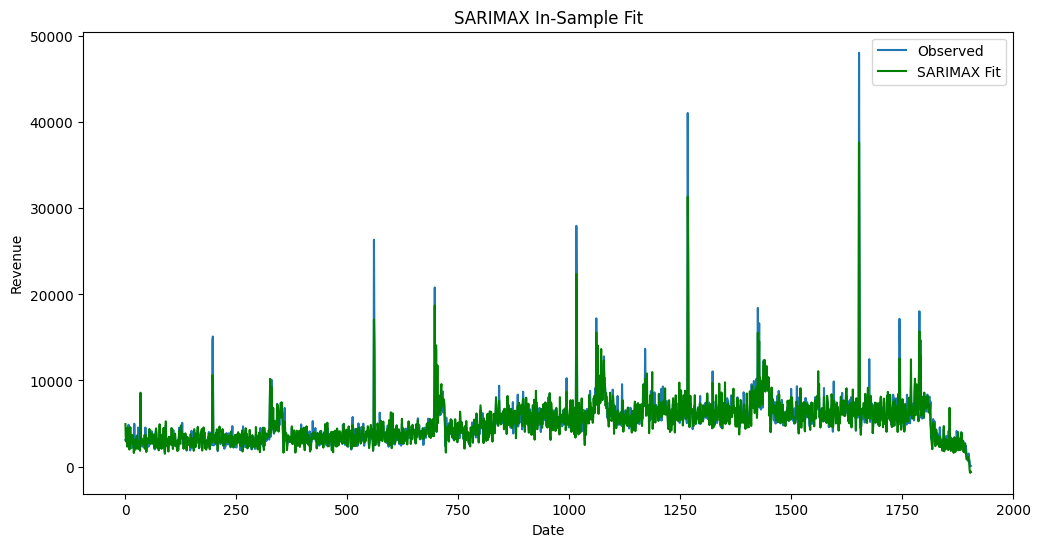

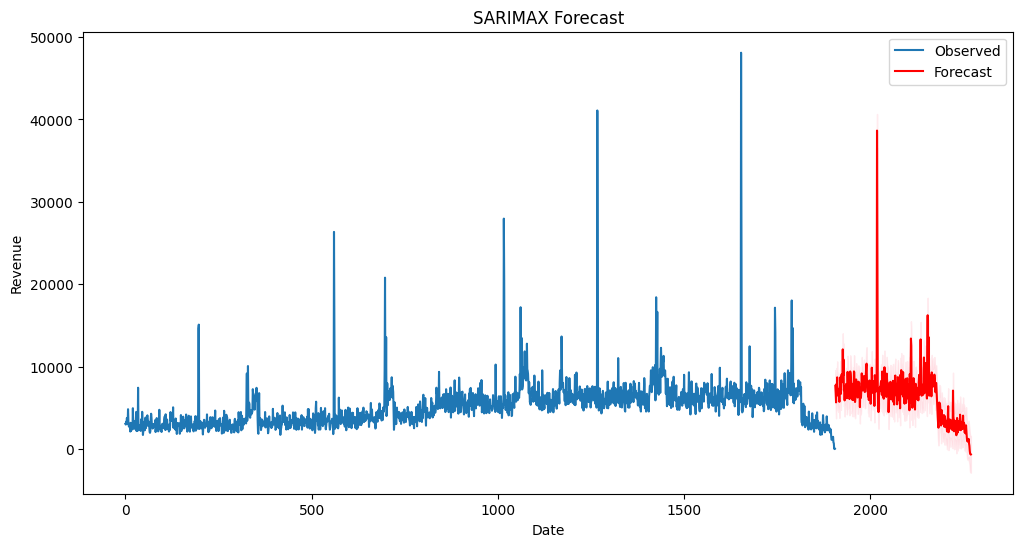

In [175]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming aggregated_data is already loaded in the notebook
# Ensure the data is sorted by the index
aggregated_data = aggregated_data.sort_index()

# Fit SARIMAX Model
model = SARIMAX(aggregated_data["Revenue"], 
                order=(1, 1, 1),  # p, d, q
                seasonal_order=(1, 1, 1, 7),  # P, D, Q, s
                exog=aggregated_data[["Quantity"]])  # Exogenous variable
result = model.fit()

# Summary of the model
print(result.summary())

# Generate in-sample predictions
in_sample_predictions = result.predict(start=0, end=len(aggregated_data)-1, exog=aggregated_data[["Quantity"]])

# Forecast steps
days_in_month = 365 / 12
forecast_steps = int(12 * days_in_month)  # Forecast for 12 months

# Assuming you have future exogenous variables for the forecast period
# If not, you can use the last available exogenous variables or create a placeholder
exog_forecast = aggregated_data[["Quantity"]].iloc[-forecast_steps:].copy()

# Forecast
forecast = result.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original data and the SARIMAX in-sample predictions
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data["Revenue"], label="Observed")
plt.plot(in_sample_predictions, label="SARIMAX Fit", color='green')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('SARIMAX In-Sample Fit')
plt.legend()
plt.show()

# Plot the original data and the SARIMAX forecast
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data["Revenue"], label="Observed")
plt.plot(forecast_values, label="Forecast", color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()

In [176]:
# Calculate accuracy metrics
mae = mean_absolute_error(aggregated_data["Revenue"], in_sample_predictions)
rmse = np.sqrt(mean_squared_error(aggregated_data["Revenue"], in_sample_predictions))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

avg_revenue = aggregated_data["Revenue"].mean()
print(f"Average Revenue: {avg_revenue:.2f}")
print(f"MAE as % of Avg Revenue: {mae / avg_revenue * 100:.2f}%")
print(f"RMSE as % of Avg Revenue: {rmse / avg_revenue * 100:.2f}%")

Mean Absolute Error (MAE): 672.18
Root Mean Squared Error (RMSE): 986.19
Average Revenue: 5157.89
MAE as % of Avg Revenue: 13.03%
RMSE as % of Avg Revenue: 19.12%


# Train Models

In [ ]:
#Decision Tree

# Create the model and fit it
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x, y)

# Prediction & Validation

In [ ]:
#Decision Tree "clf"

print("\n\nIn-sample accuracy: %s%%\n\n" 
 % str(round(100*accuracy_score(y, clf.predict(x)), 2)))
print("\n\nOut-of-sample accuracy: %s%%\n\n"
%str(round(100*accuracy_score(yt, clf.predict(xt)), 2)))